In [2]:
# Imports and data preparation

In [3]:
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import globals
import scipy
import math
import data_extraction.get_indices as get_indices
from assign_coordinates_to_walls import alcove_x, alcove_y
from parse_data import preprocess



# Prepare data - load json data and convert it into df and list of trials
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis'
json_filenames = ['2024-09-13_11-31-01_YansuJerrySocial.json']

df, trial_list = prepare_data.prepare_data(data_folder, json_filenames)
print("columns:",df.columns) 

Alcove X Coordinates: [12.31592235091189, 15.582040815294189, 19.726838936116845, 19.726838936116845, 15.582040815294189, 12.31592235091189, 2.309494514323318, -2.3094945143233154, -12.315922350911888, -15.582040815294185, -19.72683893611684, -19.72683893611684, -15.582040815294192, -12.315922350911897, -2.309494514323324, 2.309494514323313]
Alcove Y Coordinates: [15.582040815294189, 12.31592235091189, 2.309494514323318, -2.3094945143233154, -12.31592235091189, -15.582040815294189, -19.726838936116845, -19.726838936116845, -15.582040815294192, -12.315922350911897, -2.3094945143233216, 2.3094945143233163, 12.315922350911892, 15.582040815294189, 19.72683893611684, 19.72683893611684]
Wall 1: X Coordinates: (12.31592235091189, 15.582040815294189), Y Coordinates: (15.582040815294189, 12.31592235091189)
Wall 2: X Coordinates: (19.726838936116845, 19.726838936116845), Y Coordinates: (2.309494514323318, -2.3094945143233154)
Wall 3: X Coordinates: (15.582040815294189, 12.31592235091189), Y Coor

In [4]:
# Winner direct trajectory from starting point to alcove center and calculated euclidian distance 

In [ ]:
def winner_direct(trial_index):

    this_trial = trial_list[trial_index]

    # isolate slice onset event, trigger event, and activating client
    slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
    trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
    
    # find index of slice onset and trigger event normalised to this trial
    slice_onset_idx = slice_onset_event.index[0]
    slice_onset_idx = int(slice_onset_idx - this_trial.index[0])
    trigger_idx = trigger_event.index[0]
    trigger_idx = int(trigger_idx - this_trial.index[0])


    num_players = preprocess.num_players(this_trial)
  
    # assign labels to values from this_trial from slice onset onwards
    coordinate_array_labels = []
    for i in range(num_players):
        coordinate_array_labels.extend((globals.PLAYER_LOC_DICT[i]['xloc'], globals.PLAYER_LOC_DICT[i]['yloc'])) 
    coordinate_arrays = {label : this_trial[label].values[slice_onset_idx:trigger_idx] for label in coordinate_array_labels}

    winner_directs = []
    for i in range(num_players):
        if i == winner:
           xs = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['xloc']][0]
           ys = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['yloc']][0]
           start_position = np.array([xs,ys])

           xe = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['xloc']][-1]
           ye = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['yloc']][-1]
           end_position = np.array([xe, ye])

           winner_direct = [np.linalg.norm(end_position - start_position)]
           winner_directs.append(winner_direct)

           print(f"Trial {trial_index}, Player {i}: winner_direct_distance = {winner_direct}")

            
    return winner_directs

# TEST----------
 
for trial_index in range(len(trial_list)): 
    try:
        direct_dist = winner_direct(trial_index)
        print("Direct distances from start to end positions:", direct_dist)
    except Exception as e:
        print(f"Error: {e}")

In [6]:

# LOSER FUNCTION

def loser_direct(trial_index):

    this_trial = trial_list[trial_index]

    # isolate slice onset event, trigger event, and activating client
    slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
    trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
    
    # find index of slice onset and trigger event normalised to this trial
    slice_onset_idx = slice_onset_event.index[0]
    slice_onset_idx = int(slice_onset_idx - this_trial.index[0])
    trigger_idx = trigger_event.index[0]
    trigger_idx = int(trigger_idx - this_trial.index[0])


    num_players = preprocess.num_players(this_trial)
  
    # assign labels to values from this_trial from slice onset onwards
    coordinate_array_labels = []
    for i in range(num_players):
        coordinate_array_labels.extend((globals.PLAYER_LOC_DICT[i]['xloc'], globals.PLAYER_LOC_DICT[i]['yloc'])) 
    coordinate_arrays = {label : this_trial[label].values[slice_onset_idx:trigger_idx] for label in coordinate_array_labels}

    loser_directs = []
    for i in range(num_players):
        if i != winner:
           xs = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['xloc']][0]
           ys = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['yloc']][0]
           start_position = np.array([xs,ys])

           xe = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['xloc']][-1]
           ye = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['yloc']][-1]
           end_position = np.array([xe, ye])

           loser_direct = [np.linalg.norm(end_position - start_position)]
           loser_directs.append(loser_direct)

           print(f"Trial {trial_index}, Player {i}: loser_direct_distance = {loser_direct}")

            
    return loser_directs
         
# TEST----------
 
for trial_index in range(len(trial_list)): 
    try:
        direct_dist = loser_direct(trial_index)
        print("Direct distances from start to end positions:", direct_dist)
    except Exception as e:
        print(f"Error: {e}")


Trial 0, Player 0: loser_direct_distance = [np.float64(16.540503236459166)]
Direct distances from start to end positions: [[np.float64(16.540503236459166)]]
Trial 1, Player 1: loser_direct_distance = [np.float64(14.557011145594888)]
Direct distances from start to end positions: [[np.float64(14.557011145594888)]]
Trial 2, Player 1: loser_direct_distance = [np.float64(8.901185713919737)]
Direct distances from start to end positions: [[np.float64(8.901185713919737)]]
Trial 3, Player 1: loser_direct_distance = [np.float64(12.970860619312155)]
Direct distances from start to end positions: [[np.float64(12.970860619312155)]]
Trial 4, Player 0: loser_direct_distance = [np.float64(17.968032735836506)]
Direct distances from start to end positions: [[np.float64(17.968032735836506)]]
Trial 5, Player 0: loser_direct_distance = [np.float64(16.221761809416808)]
Direct distances from start to end positions: [[np.float64(16.221761809416808)]]
Trial 6, Player 1: loser_direct_distance = [np.float64(18.79

In [7]:

# PATH DISTANCE

# main function summing over euclidian distances between points on trajectory
def path_distance(trial_index):
  
    this_trial = trial_list[trial_index]

    # isolate slice onset event, trigger event, and activating client
    slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
    trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
    
    # find index of slice onset and trigger event normalised to this trial
    slice_onset_idx = slice_onset_event.index[0]
    slice_onset_idx = int(slice_onset_idx - this_trial.index[0])
    trigger_idx = trigger_event.index[0]
    trigger_idx = int(trigger_idx - this_trial.index[0])

    num_players = preprocess.num_players(this_trial)

    # define trajectory as the set of points on the path
    # create list containing labels for player coordinates from slice onset to trigger event
    coordinate_array_labels = []
    for i in range(num_players):
        coordinate_array_labels.extend((globals.PLAYER_LOC_DICT[i]['xloc'], globals.PLAYER_LOC_DICT[i]['yloc'])) 
    coordinate_arrays = {label : this_trial[label].values[slice_onset_idx:trigger_idx] for label in coordinate_array_labels}
    # maybe update above coordinate_array_labels?

    wa_distance = 0.0  # Actual distance for the winner
    la_distance = 0.0  # Actual distance for the loser

    for i in range(num_players):
           x = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['xloc']]  # Player's x position
           y = coordinate_arrays[globals.PLAYER_LOC_DICT[i]['yloc']]  # Player's y position
           trajectory = np.array([x,y])
        
           a_distance = np.sum(np.linalg.norm(np.diff(trajectory, axis=1), axis=0))
       
           if i == winner:
              wa_distance = a_distance  # Store winner's distance
              print(f"Trial {trial_index}, Winning player {i}: a_distance = {a_distance}")
           else:
              la_distance = a_distance  # Store loser's distance
              print(f"Trial {trial_index}, Losing player {i}: a_distance = {a_distance}")

    return wa_distance, la_distance  # Return distances for winner and loser

    
# TEST-------------

    
for trial_index in range(len(trial_list)): 
    try:
       a_distance = path_distance(trial_index)
       print("Actual distance travelled from slice onset to trigger event:", a_distance)
    except Exception as e:
       print(f"Error: {e}")



Trial 0, Losing player 0: a_distance = 25.817705788268015
Trial 0, Winning player 1: a_distance = 22.218727275298072
Actual distance travelled from slice onset to trigger event: (np.float64(22.218727275298072), np.float64(25.817705788268015))
Trial 1, Winning player 0: a_distance = 10.672601669526687
Trial 1, Losing player 1: a_distance = 16.587903108502484
Actual distance travelled from slice onset to trigger event: (np.float64(10.672601669526687), np.float64(16.587903108502484))
Trial 2, Winning player 0: a_distance = 27.409117127968287
Trial 2, Losing player 1: a_distance = 33.68521854546655
Actual distance travelled from slice onset to trigger event: (np.float64(27.409117127968287), np.float64(33.68521854546655))
Trial 3, Winning player 0: a_distance = 9.954407551784069
Trial 3, Losing player 1: a_distance = 15.498282491772986
Actual distance travelled from slice onset to trigger event: (np.float64(9.954407551784069), np.float64(15.498282491772986))
Trial 4, Losing player 0: a_dist

In [8]:
def w_ratio_f(trial_index):

   this_trial = trial_list[trial_index]

   # isolate slice onset event, trigger event, and activating client
   slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
   trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    
   winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
   loser = 1 if winner == 0 else 0
   num_players = preprocess.num_players(this_trial)

   actual_distances = path_distance(trial_index)
   wa_distance = actual_distances[0]
   direct_distances = winner_direct(trial_index)

   win_direct_distance = direct_distances[0]

   if wa_distance == 0:
        return win_direct_distance  # If direct distance is zero, return the actual distance
   else:
        return win_direct_distance / wa_distance  # Calculate the ratio

   #if win_direct_distance == 0:
        #return wa_distance  # If direct distance is zero, return the actual distance
   #else:
        #return wa_distance / win_direct_distance  # Calculate the ratio

for trial_index in range(len(trial_list)): 
    try:
       ratio = w_ratio_f(trial_index)
       print("Winner ratio between actual distance and direct distance {trial_index}:", ratio)
    except Exception as e:
       print(f"Error: {e}")

Trial 0, Losing player 0: a_distance = 25.817705788268015
Trial 0, Winning player 1: a_distance = 22.218727275298072
Trial 0, Player 1: winner_direct_distance = [np.float64(17.525123748363463)]
Winner ratio between actual distance and direct distance {trial_index}: [0.78875462]
Trial 1, Winning player 0: a_distance = 10.672601669526687
Trial 1, Losing player 1: a_distance = 16.587903108502484
Trial 1, Player 0: winner_direct_distance = [np.float64(8.265670294632965)]
Winner ratio between actual distance and direct distance {trial_index}: [0.77447567]
Trial 2, Winning player 0: a_distance = 27.409117127968287
Trial 2, Losing player 1: a_distance = 33.68521854546655
Trial 2, Player 0: winner_direct_distance = [np.float64(25.94715976352795)]
Winner ratio between actual distance and direct distance {trial_index}: [0.94666164]
Trial 3, Winning player 0: a_distance = 9.954407551784069
Trial 3, Losing player 1: a_distance = 15.498282491772986
Trial 3, Player 0: winner_direct_distance = [np.fl

In [9]:

# LOSER RATIO

def l_ratio_f(trial_index):

   this_trial = trial_list[trial_index]

   # isolate slice onset event, trigger event, and activating client
   slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
   trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    
   winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
   loser = 1 if winner == 0 else 0
   num_players = preprocess.num_players(this_trial)

   actual_distances = path_distance(trial_index)
   la_distance = actual_distances[1]
   direct_distances = loser_direct(trial_index)

   loser_direct_distance = direct_distances[0]

   if la_distance == 0:
        return loser_direct_distance  # If direct distance is zero, return the actual distance
   else:
        return loser_direct_distance / la_distance  # Calculate the ratio

    
   #if loser_direct_distance == 0:
        #return la_distance  # If direct distance is zero, return the actual distance
   #else:
        #return la_distance / loser_direct_distance  # Calculate the ratio

for trial_index in range(len(trial_list)): 
    try:
       ratio = l_ratio_f(trial_index)
       print("Loser ratio between actual distance and direct distance {trial_index}:", ratio)
    except Exception as e:
       print(f"Error: {e}")




Trial 0, Losing player 0: a_distance = 25.817705788268015
Trial 0, Winning player 1: a_distance = 22.218727275298072
Trial 0, Player 0: loser_direct_distance = [np.float64(16.540503236459166)]
Loser ratio between actual distance and direct distance {trial_index}: [0.64066511]
Trial 1, Winning player 0: a_distance = 10.672601669526687
Trial 1, Losing player 1: a_distance = 16.587903108502484
Trial 1, Player 1: loser_direct_distance = [np.float64(14.557011145594888)]
Loser ratio between actual distance and direct distance {trial_index}: [0.87756789]
Trial 2, Winning player 0: a_distance = 27.409117127968287
Trial 2, Losing player 1: a_distance = 33.68521854546655
Trial 2, Player 1: loser_direct_distance = [np.float64(8.901185713919737)]
Loser ratio between actual distance and direct distance {trial_index}: [0.26424604]
Trial 3, Winning player 0: a_distance = 9.954407551784069
Trial 3, Losing player 1: a_distance = 15.498282491772986
Trial 3, Player 1: loser_direct_distance = [np.float64(

In [ ]:

# PERFORMANCE MEASURES

# Prepare data - load json data and convert it into df and list of trials
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json data'
json_filenames = ['2024-09-13_11-31-00_YansuJerrySocial.json']

df, trial_list = prepare_data.prepare_data(data_folder, json_filenames)
print("columns:", df.columns)

new_player_1_scores = [50, 50, 50, 50, 100, 150, 150, 170, 170, 190, 210, 210, 260, 310, 360, 380, 380, 430, 480, 480, 530, 550, 570, 570, 620, 620, 620, 670, 670, 670, 690, 690, 740, 760, 760, 810, 860, 880, 930, 980, 1030, 1030, 1030, 1080, 1130, 1150, 1150, 1150, 1150, 1150, 1200, 1200, 1200, 1250, 1250, 1270, 1320, 1320, 1340, 1340, 1390, 1410, 1460, 1460, 1510, 1530, 1530, 1580, 1580, 1580, 1630, 1630, 1630, 1630, 1630, 1680, 1680, 1680, 1680, 1680, 1730, 1780, 1780, 1830, 1830, 1880, 1900, 1900, 1950, 1950, 2000, 2020, 2040, 2090, 2090, 2110, 2110, 2130, 2130, 2130, 2180, 2230, 2230, 2230, 2280, 2330, 2330, 2380, 2400, 2450, 2470, 2470, 2490, 2540, 2560, 2610, 2630, 2650, 2650, 2700, 2700, 2700, 2700, 2750, 2770, 2820, 2870, 2920, 2920]
new_player_0_scores = [0, 50, 70, 90, 90, 90, 110, 110, 160, 160, 160, 210, 210, 210, 210, 210, 260, 260, 260, 280, 280, 280, 280, 330, 330, 350, 370, 370, 390, 440, 440, 490, 490, 490, 510, 510, 510, 510, 510, 510, 510, 560, 610, 610, 610, 610, 660, 710, 760, 810, 810, 860, 910, 910, 960, 960, 960, 980, 980, 1030, 1030, 1030, 1030, 1050, 1050, 1050, 1100, 1100, 1150, 1170, 1170, 1190, 1210, 1230, 1280, 1280, 1330, 1380, 1400, 1450, 1450, 1450, 1470, 1470, 1520, 1520, 1520, 1570, 1570, 1590, 1590, 1590, 1590, 1590, 1610, 1610, 1660, 1660, 1680, 1730, 1730, 1730, 1780, 1830, 1830, 1830, 1880, 1880, 1880, 1880, 1880, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1950, 1950, 2000, 2050, 2100, 2100, 2100, 2100, 2100, 2100, 2150]

# Function to calculate performance measures
def calculate_performance_measures(player_0_scores, player_1_scores):
    performance_measures = []
    for score_0, score_1 in zip(player_0_scores, player_1_scores):
        total_score = score_0 + score_1
        if total_score > 0:
            performance_0 = score_0 / total_score
            performance_1 = score_1 / total_score
        else:
            performance_0 = 0
            performance_1 = 0
        performance_measures.append((performance_0, performance_1))
    return performance_measures

# Calculate performance measures
performance_measures = calculate_performance_measures(new_player_0_scores, new_player_1_scores)

performance_df = pd.DataFrame(performance_measures, columns=['Player_0_Performance', 'Player_1_Performance'])

print(performance_df)


def collect_winner_loser_performance_for_each(trial_list, player_0_scores, player_1_scores, trial_index=None):
    
    player_0_w_performances = []
    player_0_l_performances = []
    player_1_w_performances = []
    player_1_l_performances = []

    if trial_index is not None:
        trials_to_process = [trial_index]
    else:
        trials_to_process = range(len(trial_list))
    
    #for trial_index in range(len(trial_list)):
       #this_trial = trial_list[trial_index]

    for idx in trials_to_process:
       this_trial = trial_list[idx]

       slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
       trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    
       if not trigger_event.empty:
          winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
          loser = 1 if winner == 0 else 0
          trigger_idx = trigger_event.index[0]

          score_0 = player_0_scores[idx]  # Player 0 score for the current trial change to [trial_index] for other version
          score_1 = player_1_scores[idx]

          total_score = score_0 + score_1
           
          performance_0 = score_0 / total_score if total_score > 0 else 0
          performance_1 = score_1 / total_score if total_score > 0 else 0

          if winner == 0:
              player_0_w_performances.append(performance_0)
              player_1_l_performances.append(performance_1)

          else:
              player_1_w_performances.append(performance_1)
              player_0_l_performances.append(performance_0)

    return {
        'player_0_w_performances': player_0_w_performances,
        'player_0_l_performances': player_0_l_performances,
        'player_1_w_performances': player_1_w_performances,
        'player_1_l_performances': player_1_l_performances
    }

results = collect_winner_loser_performance_for_each(trial_list, new_player_0_scores, new_player_1_scores)

# Access the specific lists
print("Player 0 Wins:", results['player_0_w_performances'])
print("Player 0 Losses:", results['player_0_l_performances'])
print("Player 1 Wins:", results['player_1_w_performances'])
print("Player 1 Losses:", results['player_1_l_performances'])


last_trigger_index = len(results['player_0_w_performances']) - 1  # Adjust based on your logic
results1 = collect_winner_loser_performance_for_each(trial_list, new_player_0_scores, new_player_1_scores, trial_index=last_trigger_index)

print("Player 0 Wins:", results1['player_0_w_performances'])
print("Player 0 Losses:", results1['player_0_l_performances'])
print("Player 1 Wins:", results1['player_1_w_performances'])
print("Player 1 Losses:", results1['player_1_l_performances'])


Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
columns: Index(['timeLocal', 'timeApplication', 'eventDescription', 'data.playerPosition.0.clientId', 'data.playerPosition.0.location.x', 'data.playerPosition.0.location.y', 'data.playerPosition.0.location.z', 'data.playerPosition.0.rotation.x', 'data.playerPosition.0.rotation.y', 'data.playerPosition.0.rotation.z', 'data.playerPosition.1.clientId', 'data.playerPosition.1.location.x', 'data.playerPosition.1.location.y', 'data.playerPosition.1.location.z', 'data.playerPosition.1.rotation.x', 'data.playerPosition.1.rotation.y', 'data.playerPosition.1.rotation.z', 'data.trialNum', 'data.trialType', 'data.wall1', 'data.wall2', 'data.wallTriggered', 'data.triggerClient', 'data.playerScores.0', 'data.playerScores.1', 'timeReferenced', 'trial_epoch'], dtype='object')
     Player_0_Performance  Player_1_Performance
0             0.000000000   

In [11]:
# CREATE PLOTS

Trial 0, Losing player 0: a_distance = 25.817705788268015
Trial 0, Winning player 1: a_distance = 22.218727275298072
Trial 0, Player 1: winner_direct_distance = [np.float64(17.525123748363463)]
Trial 0, Losing player 0: a_distance = 25.817705788268015
Trial 0, Winning player 1: a_distance = 22.218727275298072
Trial 0, Player 0: loser_direct_distance = [np.float64(16.540503236459166)]
Trial 1, Winning player 0: a_distance = 10.672601669526687
Trial 1, Losing player 1: a_distance = 16.587903108502484
Trial 1, Player 0: winner_direct_distance = [np.float64(8.265670294632965)]
Trial 1, Winning player 0: a_distance = 10.672601669526687
Trial 1, Losing player 1: a_distance = 16.587903108502484
Trial 1, Player 1: loser_direct_distance = [np.float64(14.557011145594888)]
Trial 2, Winning player 0: a_distance = 27.409117127968287
Trial 2, Losing player 1: a_distance = 33.68521854546655
Trial 2, Player 0: winner_direct_distance = [np.float64(25.94715976352795)]
Trial 2, Winning player 0: a_distan

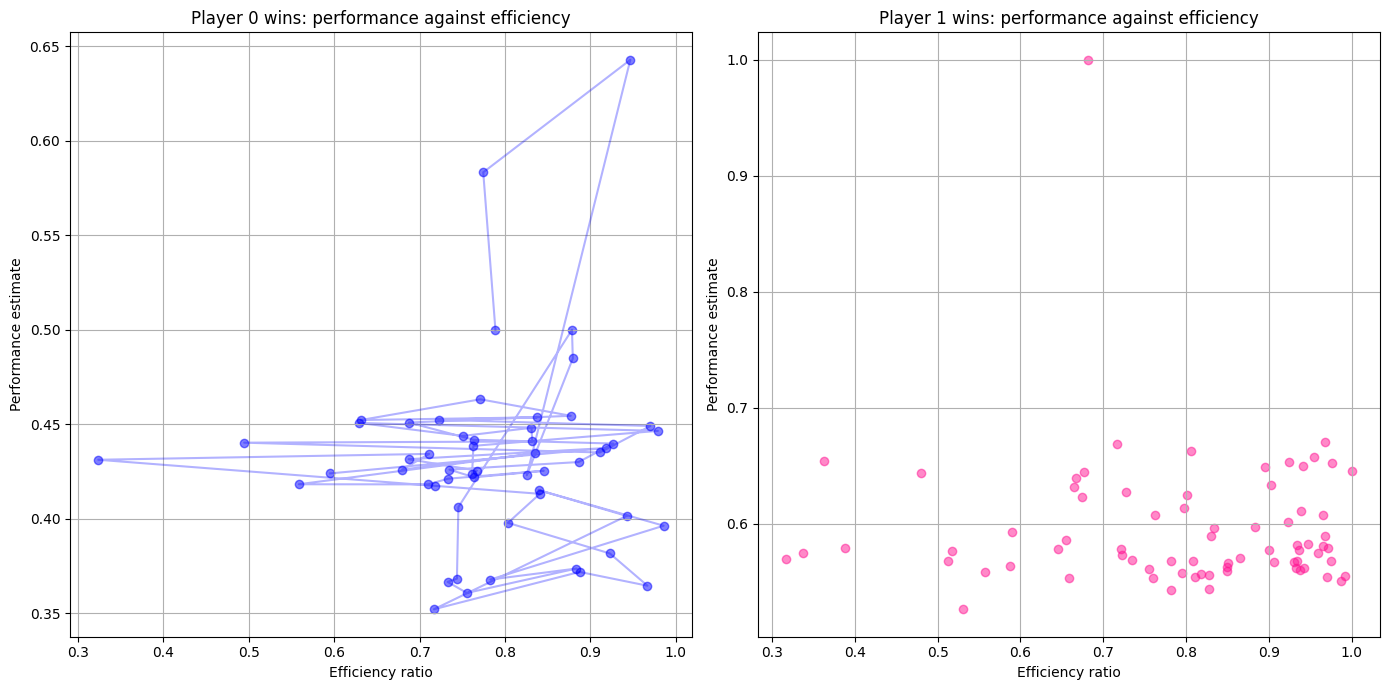

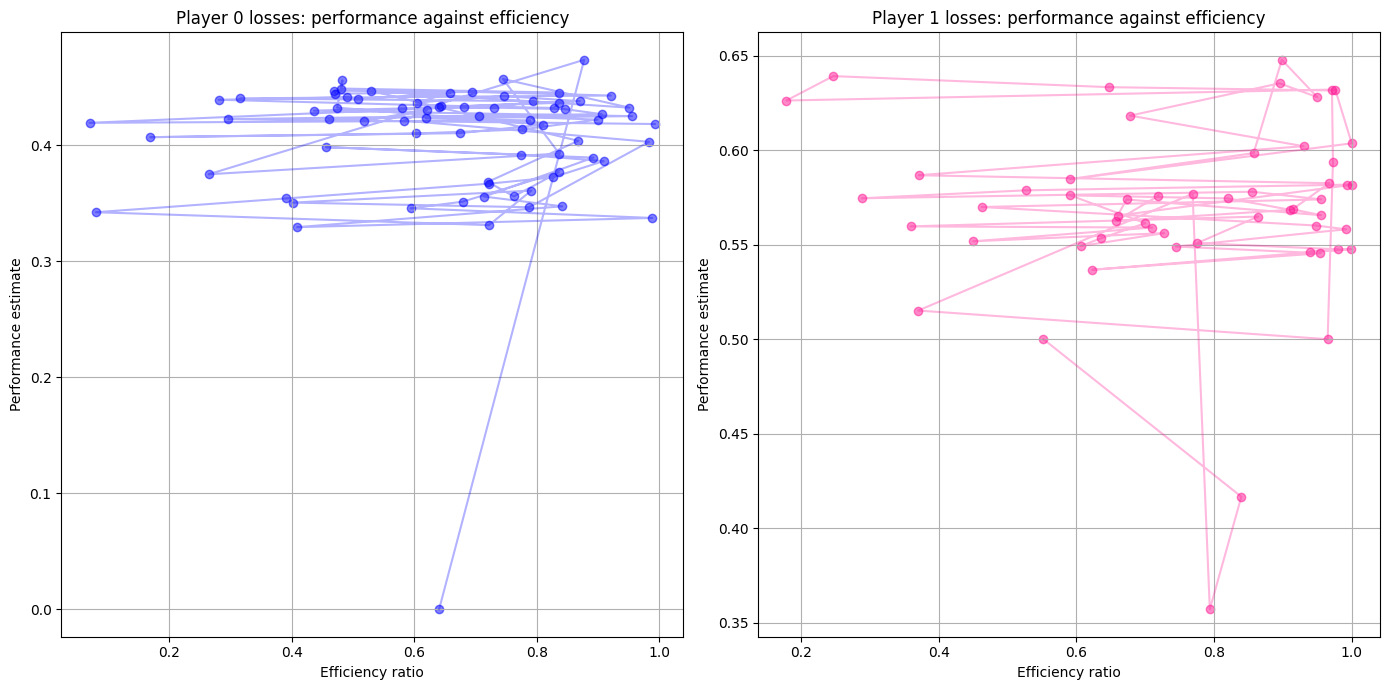

In [12]:
# Initialize lists to store winner and loser ratios
winner_ratios = []
loser_ratios = []

# Calculate the winner and loser ratios for each trial
for trial_index in range(len(trial_list)):
    try:
        winner_ratio = w_ratio_f(trial_index)
        loser_ratio = l_ratio_f(trial_index)
        winner_ratios.append(winner_ratio)
        loser_ratios.append(loser_ratio)
    except Exception as e:
        print(f"Error calculating ratios for trial {trial_index}: {e}")

import numpy as np

# performance lists to numpy arrays
player_0_wins = np.array(results['player_0_w_performances'])
player_0_losses = np.array(results['player_0_l_performances'])
player_1_wins = np.array(results['player_1_w_performances'])
player_1_losses = np.array(results['player_1_l_performances'])

# mapping for winner/loser ratios
player_0_win_ratios = winner_ratios[:len(player_0_wins)]
player_0_loss_ratios = loser_ratios[:len(player_0_losses)]
player_1_win_ratios = winner_ratios[len(player_0_wins):len(player_0_wins) + len(player_1_wins)]
player_1_loss_ratios = loser_ratios[len(player_0_losses):len(player_0_losses) + len(player_1_losses)]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator


# lists to arrays
player_0_win_ratios = np.array(player_0_win_ratios)
player_0_wins = np.array(player_0_wins)
player_1_win_ratios = np.array(player_1_win_ratios)
player_1_wins = np.array(player_1_wins)
player_0_loss_ratios = np.array(player_0_loss_ratios)
player_0_losses = np.array(player_0_losses)
player_1_loss_ratios = np.array(player_1_loss_ratios)
player_1_losses = np.array(player_1_losses)

# check the shapes of the arrays
print("Player 0 Win Ratios shape:", player_0_win_ratios.shape)
print("Player 0 Wins shape:", player_0_wins.shape)
print("Player 1 Win Ratios shape:", player_1_win_ratios.shape)
print("Player 1 Wins shape:", player_1_wins.shape)

# figure and axis
plt.figure(figsize=(14, 7))

# player 0 wins
plt.subplot(1, 2, 1)
#plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.scatter(player_0_win_ratios.flatten(), player_0_wins, color='blue', label='Player 0 Wins', alpha=0.5)
plt.plot(player_0_win_ratios.flatten(), player_0_wins, color='blue', alpha=0.3)
plt.title('Player 0 wins: performance against efficiency')
plt.xlabel('Efficiency ratio')
plt.ylabel('Performance estimate')
plt.grid(True)

# player 1 wins
plt.subplot(1, 2, 2)
#plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.scatter(player_1_win_ratios.flatten(), player_1_wins, color='deeppink', label='Player 1 Wins', alpha=0.5)
#plt.plot(player_1_win_ratios.flatten(), player_1_wins, color='deeppink', alpha=0.3)
plt.title('Player 1 wins: performance against efficiency')
plt.xlabel('Efficiency ratio')
plt.ylabel('Performance estimate')
plt.grid(True)

plt.tight_layout()
plt.show()

# plot losses
plt.figure(figsize=(14, 7))

# player 0 losses
plt.subplot(1, 2, 1)
#plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.scatter(player_0_loss_ratios.flatten(), player_0_losses, color='blue', label='Player 0 Losses', alpha=0.5)
plt.plot(player_0_loss_ratios.flatten(), player_0_losses, color='blue', alpha=0.3)
plt.title('Player 0 losses: performance against efficiency')
plt.xlabel('Efficiency ratio')
plt.ylabel('Performance estimate')
plt.grid(True)

# player 1 losses
plt.subplot(1, 2, 2)
#plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.scatter(player_1_loss_ratios.flatten(), player_1_losses, color='deeppink', label='Player 1 Losses', alpha=0.5)
plt.plot(player_1_loss_ratios.flatten(), player_1_losses, color='deeppink', alpha=0.3)
plt.title('Player 1 losses: performance against efficiency')
plt.xlabel('Efficiency ratio')
plt.ylabel('Performance estimate')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# avg EFFICIENCY

player_0_win_ratios = np.array(player_0_win_ratios)
no_player_0_win_ratios = len(player_0_win_ratios)

player_1_win_ratios = np.array(player_1_win_ratios)
no_player_1_win_ratios = len(player_1_win_ratios)

player_0_loss_ratios = np.array(player_0_loss_ratios)
no_player_0_loss_ratios = len(player_0_loss_ratios)

player_1_loss_ratios = np.array(player_1_loss_ratios)
no_player_1_loss_ratios = len(player_1_loss_ratios)

avg_eff_WP0 = sum(player_0_win_ratios)/no_player_0_win_ratios
avg_eff_WP1 = sum(player_1_win_ratios)/no_player_1_win_ratios
avg_eff_LP0 = sum(player_0_loss_ratios)/no_player_0_loss_ratios
avg_eff_LP1 = sum(player_1_loss_ratios)/no_player_1_loss_ratios


print(avg_eff_WP0)
print(avg_eff_WP1)
print(avg_eff_LP0)
print(avg_eff_LP1)


[0.78630988]
[0.79317573]
[0.65906349]
[0.75300554]


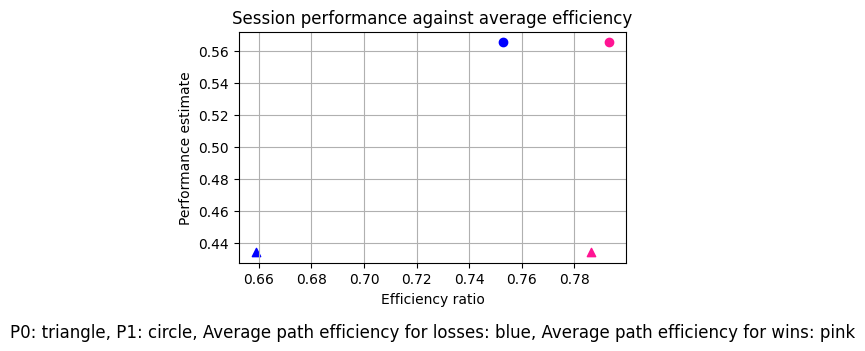

In [14]:
# avg EFFICIENCY against PERFORMANCE in a single session

plt.figure(figsize=(5,3))

plt.scatter(avg_eff_WP0, results1['player_0_w_performances'], color='deeppink', label='Player 0 Wins', marker='^')
plt.scatter(avg_eff_LP0, results1['player_0_w_performances'], color='blue', label='Player 0 Wins', marker='^')
plt.scatter(avg_eff_WP1, results1['player_1_l_performances'], color='deeppink', label='Player 0 Wins')
plt.scatter(avg_eff_LP1, results1['player_1_l_performances'], color='blue', label='Player 0 Wins')


plt.title('Session performance against average efficiency')
plt.xlabel('Efficiency ratio')
plt.ylabel('Performance estimate')
plt.grid(True)

plt.text(0.5, -0.30, 'P0: triangle, P1: circle, Average path efficiency for losses: blue, Average path efficiency for wins: pink', 
         ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)


plt.show()


In [16]:
# Extract player scores
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import globals
import scipy
import math
import data_extraction.get_indices as get_indices
from assign_coordinates_to_walls import alcove_x, alcove_y
from parse_data import preprocess

this_trial = trial_list[trial_index]

# isolate slice onset event, trigger event, and activating client
slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
    

data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json data'
json_filenames = ['2024-09-13_11-31-00_YansuJerrySocial.json']

df, trial_list = prepare_data.prepare_data(data_folder, json_filenames)
print("columns:", df.columns)


player_0_scores = int(trigger_event[globals.PLAYER_0_SCORE].item())
print("player 0 score:", player_0_scores)


Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
columns: Index(['timeLocal', 'timeApplication', 'eventDescription', 'data.playerPosition.0.clientId', 'data.playerPosition.0.location.x', 'data.playerPosition.0.location.y', 'data.playerPosition.0.location.z', 'data.playerPosition.0.rotation.x', 'data.playerPosition.0.rotation.y', 'data.playerPosition.0.rotation.z', 'data.playerPosition.1.clientId', 'data.playerPosition.1.location.x', 'data.playerPosition.1.location.y', 'data.playerPosition.1.location.z', 'data.playerPosition.1.rotation.x', 'data.playerPosition.1.rotation.y', 'data.playerPosition.1.rotation.z', 'data.trialNum', 'data.trialType', 'data.wall1', 'data.wall2', 'data.wallTriggered', 'data.triggerClient', 'data.playerScores.0', 'data.playerScores.1', 'timeReferenced', 'trial_epoch'], dtype='object')
player 0 score: 2100
